# Etapa 2 - Desenvolvimento

Importando Bibliotecas Pandas, Numpy e Matplotlib:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Leitura do arquvo csv `googleplaystore.csv`:

In [3]:
df = pd.read_csv('../Arquivo/googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 2. Removendo Linhas Duplicadas e Ajustando Dados de Linha

- Removendo aplicativos duplicados:

In [4]:
# Antes da remoção:
df.shape[0]

10841

In [5]:
# Remoção das linhas por app duplicados, mantendo a suas primeiras aparições e criando uma cópia do DataFrame original:
df_limpo = df.drop_duplicates(subset=['App'],keep='first').copy()

In [6]:
# Depois da remoção:
df_limpo.shape[0]

9660

- Ajustando dados trocados da linha do App 'Life Made WI-Fi Touchscreen Photo Frame':

In [7]:
# Localização o app Life Made WI-Fi Touchscreen Photo Frame por índice:
idx = df_limpo[df_limpo['App'] == 'Life Made WI-Fi Touchscreen Photo Frame'].index[0]
df_limpo.loc[[idx]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
# Listagem com os valores corretos para cada coluna:
valores_corretos = [
    None,        
    1.9,               
    19,               
    '3.0M',             
    '1,000+',         
    'Free',            
    '0',               
    'Everyone',         
    None,        
    'February 11, 2018',
    '1.0.19',          
    '4.0 and up'     
]

# Atualiazação das colunas:
colunas_para_atualizar = [
    'Category', 'Rating', 'Reviews', 'Size', 'Installs',
    'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'
]

# Atribuição dos valores corretos diretamente:
for col, val in zip(colunas_para_atualizar, valores_corretos):
    df_limpo.loc[idx, col] = val

# Visualização da linha
df_limpo.loc[[idx]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,None,1.9,19,3.0M,"1,000+",Free,0,Everyone,None,"February 11, 2018",1.0.19,4.0 and up


### 3. Gráfico de Barras - Top 5 Apps por Número de Instalações

In [9]:
# Conversão dos dados em string:
df_limpo['Installs'] = df_limpo['Installs'].astype(str)

# Remoção dos caracteres '+' e ',':
df_limpo['Installs'] = df_limpo['Installs'].str.replace('+', '', regex=False)
df_limpo['Installs'] = df_limpo['Installs'].str.replace(',', '', regex=False)

# Conversão dos dados da coluna para números:
df_limpo['Installs'] = pd.to_numeric(df_limpo['Installs'], errors='coerce')

# Remoção de qualquer linha em que 'Installs' tenha valor NaN:
df_limpo.dropna(subset=['Installs'], inplace=True)

# Conversão dos dados para o tipo inteiro:
df_limpo['Installs'] = df_limpo['Installs'].astype(int)

- Ordenando os Top 5:

In [10]:
# Ordenação dos dados e resgatando o Top 5:
top_5_apps = df_limpo.sort_values(by='Installs', ascending=False).head(5)
# Visualização dos Top 5
top_5_apps[['App', 'Installs']]


,App,Installs
1654,Subway Surfers,1000000000
152,Google Play Books,1000000000
3665,YouTube,1000000000
2808,Google Photos,1000000000
2554,Google+,1000000000


- Criando gráfico Top 5 mais instalados:

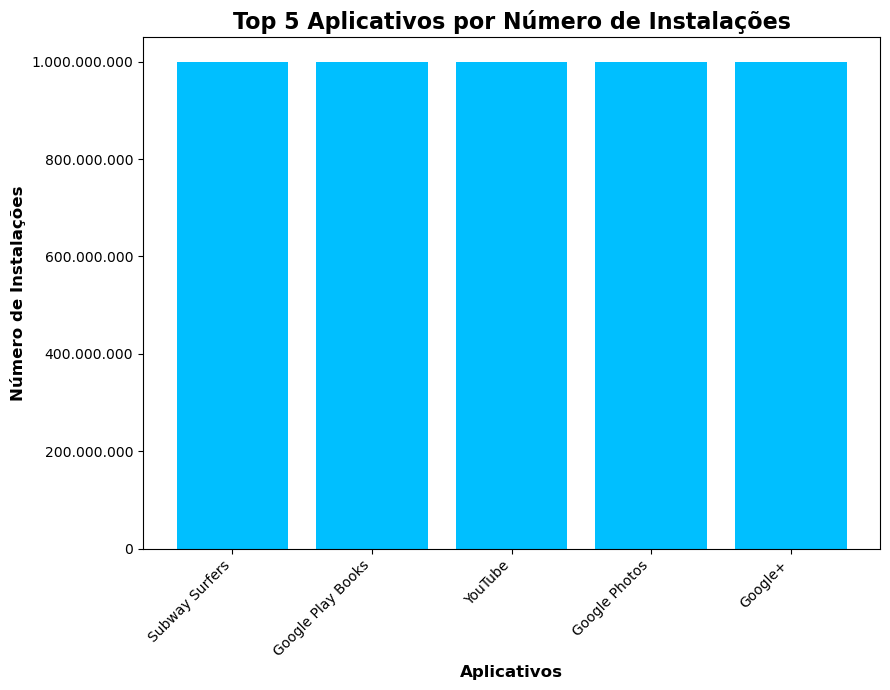

In [11]:
# Criação do gráfico:
plt.figure(figsize=(9, 7))

# Criação das barras verticais:
plt.bar(top_5_apps['App'], top_5_apps['Installs'], color='deepskyblue')

# Adição de Título e Rótulos dos Eixos:
plt.xlabel('Aplicativos', fontsize=12, fontweight='bold')
plt.ylabel('Número de Instalações', fontsize=12, fontweight='bold')
plt.title('Top 5 Aplicativos por Número de Instalações', fontsize=16, fontweight='bold')

# Rotação dos nomes dos apps:
plt.xticks(rotation=45, ha='right')

# Remoção de Grades:
plt.grid(False)

# Formatação dos valores no eixo Y:
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)).replace(",", ".")))

#Formatção do Espaçamento:
plt.tight_layout()

# Exibição do gráfico:
plt.show()


### 4. Gráfico de Pizza para Frequência de Categorias 

- Contando Categorias:

In [12]:
# Contagem  da frequência de cada categoria:
contagem_categoria = df_limpo['Category'].value_counts()

- Preparando os dados:

In [13]:
# Seleção de top 5 para evitar gráfico poluído:
top_numero = 5
top_categorias = contagem_categoria.head(top_numero)
contagem_outros = contagem_categoria.iloc[top_numero:].sum()

# Adição a categoria 'Outros':
if contagem_outros > 0:
    top_categorias['Outros'] = contagem_outros

- Criando do Gráfico de Pizza:

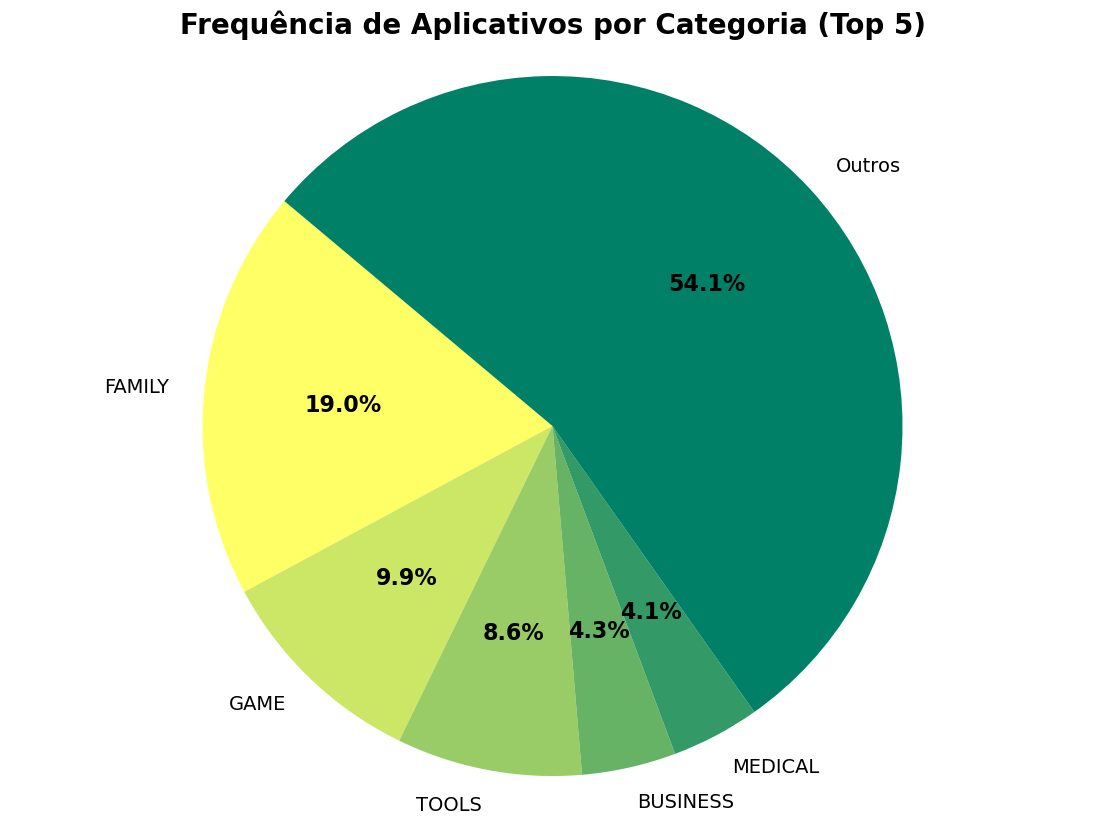

In [14]:
# Criação do gráfico de pizza:
plt.figure(figsize=(14, 10))

#Definição das cores do gráfico:
cores = plt.get_cmap('summer_r', len(top_categorias))(np.arange(len(top_categorias)))

# Formatação dos textos do gráfico:
fatias, texto, autotexto = plt.pie(top_categorias,
                                  labels=top_categorias.index,
                                  autopct='%1.1f%%',
                                  startangle=140,
                                  colors=cores,
                                  textprops={'fontsize': 14})

# Cor das porcentagens:
plt.setp(autotexto, size=16, weight="bold", color='black')

# Adição do título
plt.title('Frequência de Aplicativos por Categoria (Top 5)', fontsize=20, fontweight='bold')

# Garantia de que o gráfico seja um círculo:
plt.axis('equal')

# Exibição do gráfico:
plt.show()

### 5. App Mais Caro 

- Limpando os dados da coluna `price`:

In [15]:
# Remoção do carcatere '$':
df_limpo['Price'] = df_limpo['Price'].astype(str).str.replace('$', '', regex=False)

# Conversão dos dados em float:
df_limpo['Price'] = pd.to_numeric(df_limpo['Price'], errors='coerce')

# Remoção de linhas em que o preço não possa ser convertido:
df_limpo.dropna(subset=['Price'], inplace=True)

- Descobrindo o mais caro:

In [16]:
# Resgate do índice do app:
indice_do_mais_caro = df_limpo['Price'].idxmax()

# Seleção e exibção do app com preço mais caro:
app_mais_caro = df_limpo.loc[indice_do_mais_caro]

print("========= O Aplicativo Mais Caro =========")
print(f"Nome: {app_mais_caro['App']}")
print(f"Preço: ${app_mais_caro['Price']:.2f}") 
print("=========== Detalhes Completos ===========")
print(app_mais_caro.to_string())

========= O Aplicativo Mais Caro =========
Nome: I'm Rich - Trump Edition
Preço: $400.00
=========== Detalhes Completos ===========
App               I'm Rich - Trump Edition
Category                         LIFESTYLE
Rating                                 3.6
Reviews                                275
Size                                  7.3M
Installs                             10000
Type                                  Paid
Price                                400.0
Content Rating                    Everyone
Genres                           Lifestyle
Last Updated                   May 3, 2018
Current Ver                          1.0.1
Android Ver                     4.1 and up


### 6. Quantidade de Apps Classificados como 'Mature 17+'

- Contagem de apps na coluna `Content Rating` com classificação 'Mature 17+':

In [17]:
# Contagem da quantidade de apps para cada classificação:
contagem_classificacao = df_limpo['Content Rating'].value_counts()

# Contagem de apps com classificação 'Mature 17+:
quantidade_mature_17 = contagem_classificacao['Mature 17+']

print(f"A quantidade de aplicativos classificados como 'Mature 17+' é igual a {quantidade_mature_17}.")


A quantidade de aplicativos classificados como 'Mature 17+' é igual a 393.


### 7. Top 10 Apps por Número de Reviews

- Limpando dados da coluna `Reviews`:

In [18]:
# Garantia que a coluna seja númerica:
df_limpo['Reviews'] = pd.to_numeric(df_limpo['Reviews'], errors='coerce')
 # Remoção de linhas se a conversão falhar:
df_limpo.dropna(subset=['Reviews'], inplace=True)
# Conversão para o tipo inteiro:
df_limpo['Reviews'] = df_limpo['Reviews'].astype(int)

- Selecionando o Top 10:

In [19]:
# Ordenação dos dados pela coluna 'Reviews' em ordem decrescente:
df_ordenado_por_reviews = df_limpo.sort_values(by='Reviews', ascending=False)
# Seleção do top 10:
top_10_reviews = df_ordenado_por_reviews.head(10)

# Exibição do resultado:
print("======== Top 10 Aplicativos por Número de Reviews ========")
print(top_10_reviews[['App', 'Reviews']].to_string(index=False))

======== Top 10 Aplicativos por Número de Reviews ========
                                               App  Reviews
                                          Facebook 78158306
                                WhatsApp Messenger 69119316
                                         Instagram 66577313
          Messenger – Text and Video Chat for Free 56642847
                                    Clash of Clans 44891723
           Clean Master- Space Cleaner & Antivirus 42916526
                                    Subway Surfers 27722264
                                           YouTube 25655305
Security Master - Antivirus, VPN, AppLock, Booster 24900999
                                      Clash Royale 23133508


### 8. Criação de 2 Cálculos sobre o Dataset


Criação de pelo menos  2 cálculos sobre o dataset e apresentação de um em formato de lista e outro em formato de valor.

#### 8.1. Top 5 Categorias com Maior Média de Avaliação -  *Formato: Lista*

- Cálculo da média da avaliação por categoria:

In [20]:
# Conversão do dados da coluna 'Rating' para numérico:
df_limpo['Rating'] = pd.to_numeric(df_limpo['Rating'], errors='coerce')

# Remoção das linhas com valor NaN:
df_rating_ok = df_limpo.dropna(subset=['Rating'])

# Agrupação por categoria e média das avaliações:
media_por_categoria = df_rating_ok.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Exibição das 5 categorias com maior média de avaliação:
top5_df = media_por_categoria.head(5).reset_index()
top5_df.columns = ['Categoria', 'Média de Avaliação']
print(top5_df.to_string(index=False))


          Categoria  Média de Avaliação
             EVENTS            4.435556
          EDUCATION            4.364407
     ART_AND_DESIGN            4.357377
BOOKS_AND_REFERENCE            4.344970
    PERSONALIZATION            4.332215


- Forma Gráfica de Exibição:

O gráfico escolhido para a visualização desse dados foi o Gráfico de Linhas. Esse gráfico é a melhor escolha para demonstar as Top 5 Categorias com Maior Média de Avaliação, pois ele permite que as variações dos valores possam ser acompanhadas de forma adequada, mesmo que elas sejam variâncias pequenas.

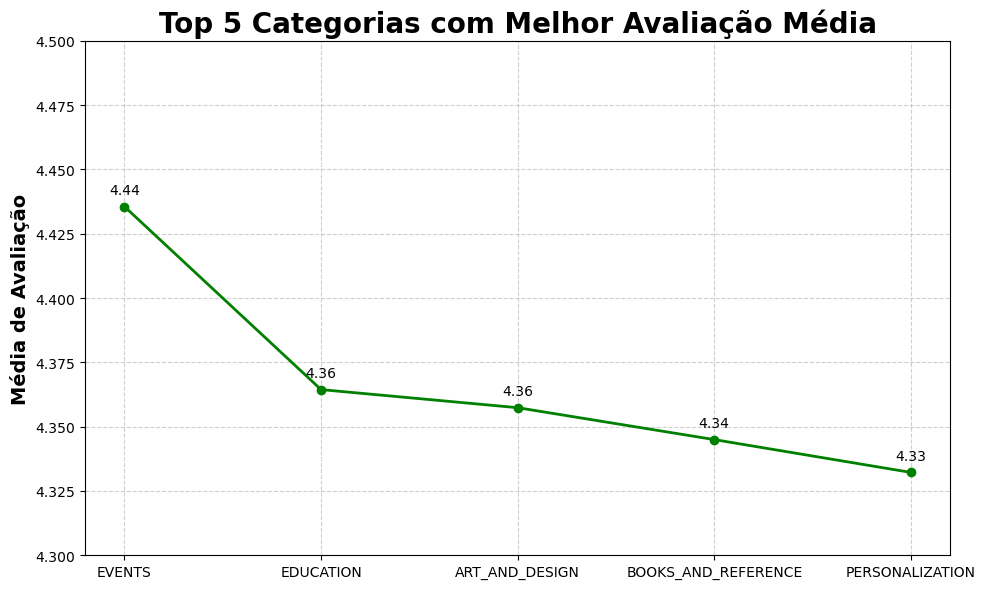

In [21]:
# Resgate das 5 primeiras categorias com maior média de avaliação:
top5_df = media_por_categoria.head(5).reset_index()
# Definição do tamanho da figura do Gráfico:
plt.figure(figsize=(10,6))

# Configuração do gráfico de linhas:
plt.plot(top5_df['Category'], top5_df['Rating'], 
         marker='o',               
         linestyle='-',             
         linewidth=2,               
         color='green')   

# Adição de título ao gráfico:
plt.title('Top 5 Categorias com Melhor Avaliação Média', fontsize=20, fontweight='bold')
# Ajuste do eixo Y:
plt.ylabel('Média de Avaliação', fontsize=14, fontweight='bold')
# Ajuste para dar destaque às notas altas:
plt.ylim(4.3, 4.5)  
# Exibição do valor de cada ponto acima da bolinha:
for i, (categoria, nota) in enumerate(zip(top5_df['Category'], top5_df['Rating'])):
    plt.text(i, nota + 0.005, f"{nota:.2f}", ha='center', fontsize=10, color='black')
# Grade de fundo pra ajudar na leitura:
plt.grid(True, linestyle='--', alpha=0.6)
# Ajuste dos elementos do gráfico:
plt.tight_layout()
# Exibição do Gráfico:
plt.show()

#### 8.2.  Porcentagem de Aplicativos Gratuitos  -  *Formato: Valor*

- Cálculo de porcentagem de aplicativos Gratuito:

In [22]:
# Remoção de linhas onde a coluna 'Type' está vazia
df_limpo.dropna(subset=['Type'], inplace=True)
# Contagem de ocorrências de cada valor na coluna:
contagem_por_tipo = df_limpo['Type'].value_counts()
# Contagem de ocorrências de aplicativos gratuitos:
apps_gratuitos = contagem_por_tipo['Free']
# Quantificação de aplicativos do dataset:
total_de_apps = len(df_limpo)
# Cálculo da porcentagem
porcentagem_gratuitos = (apps_gratuitos / total_de_apps) * 100
# 7. Exibição do resultado formatado
print(f"Porcentagem de Aplicativos Gratuitos: {porcentagem_gratuitos:.2f}%")

Porcentagem de Aplicativos Gratuitos: 92.17%


- Forma Gráfica de Exibição:

O Gráfico de Rosca foi uma alternativa moderna e visualmente mais limpa para visualização desse cálculo. Ele cumpre a mesma função de mostrar a proporção entre aplicativos gratuitos e pagos, mas com um design mais leve, focando a atenção nos arcos e apresentando a informação de forma elegante e direta.

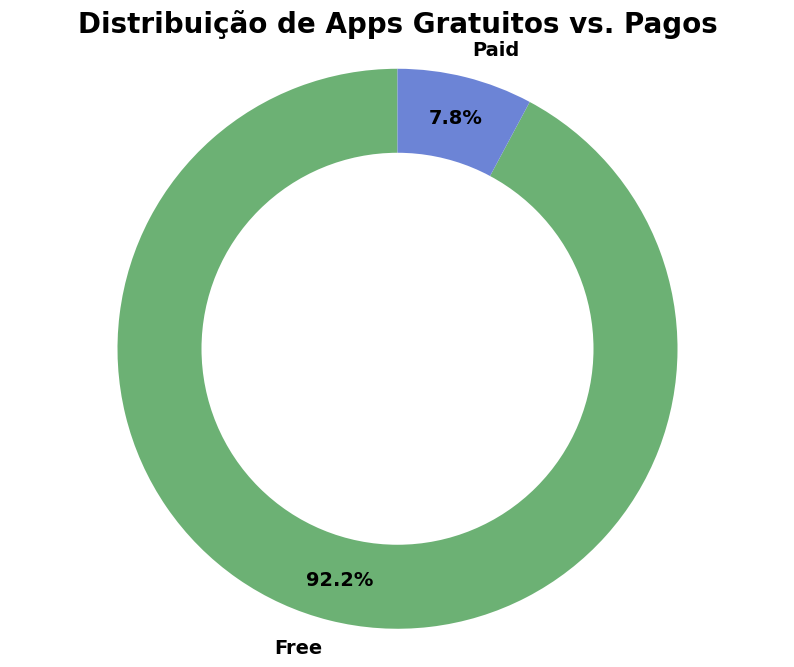

In [23]:
# Criação do gráfico de rosca:
plt.figure(figsize=(10, 8))
# Definição de cores 
cores = ["#6CB174", "#6C84D6"]

# Criação do gráfico base:
plt.pie(contagem_por_tipo,       
        labels=contagem_por_tipo.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=cores,
        pctdistance=0.85, # Move a porcentagem para mais perto do centro
        textprops={'fontsize': 14, 'fontweight': 'bold'})

# Criação do Círculo branco no meio:
circulo_central = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo_central)

# Adição de título:
plt.title('Distribuição de Apps Gratuitos vs. Pagos', fontsize=20, fontweight='bold')
# Garantia do Círculo:
plt.axis('equal')
# Exibição do Gráfico:
plt.show()